In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.backends.backend_pdf import PdfPages
import scipy.cluster.hierarchy as spc
from scipy.stats import pearsonr

In [89]:
df=pd.read_csv('Stats_task2.csv')

In [90]:
#Removing extra columns
df =  df.iloc[:,0:16]
df = df.drop('MS1_count',axis = 1)
df = df.drop('MS2_triggered',axis = 1)
df = df.drop('Ion Type',axis = 1)

In [91]:
df

,ID,mz,RT_median,Intensity_11801 600uE CLDC BR1 IS IDA-1,Intensity_11801 600uE CLDC BR2 IS IDA-1,Intensity_11801 LDC 25-HR BR1 IS IDA-1,Intensity_11801 LDC 25-HR BR2 IS IDA-1,Intensity_11801 LDC 31-HR BR1 IS IDA-1,Intensity_11801 LDC 31-HR BR2 IS IDA-1,Intensity_11801 LDC 37-HR BR1 IS IDA-1,Intensity_11801 LDC 37-HR BR2 IS IDA-1,Intensity_11801 LDC 43-HR BR1 IS IDA-1,Intensity_11801 LDC 43-HR BR2 IS IDA-1
0,1,380.916,0.16,931.17,0.00,0.0,0.0,0.00,0.0,819.61,774.15,0.00,771.39
1,2,244.968,0.18,2925.11,1964.07,0.0,0.0,0.00,0.0,2677.71,2370.63,0.00,0.00
2,3,384.912,0.18,775.42,772.65,0.0,0.0,0.00,0.0,562.19,0.00,0.00,678.49
3,4,242.969,0.19,4442.34,2794.34,0.0,0.0,0.00,0.0,3718.51,3660.23,0.00,3348.82
4,5,241.976,0.21,0.00,382.06,0.0,0.0,0.00,0.0,197.62,443.55,0.00,430.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2632,244.968,24.53,4690.34,5378.54,0.0,0.0,3042.17,0.0,0.00,2797.01,3713.84,0.00
2632,2633,242.969,24.54,7128.85,8237.81,0.0,0.0,4778.93,0.0,5507.32,4151.96,0.00,5049.63
2633,2634,340.974,24.55,3625.66,0.00,0.0,0.0,633.37,0.0,1842.82,2069.59,2752.49,258.05
2634,2635,240.972,24.56,13734.50,12818.58,0.0,0.0,5922.76,0.0,7523.57,6936.35,9466.04,9308.27


In [92]:
df2 = df[['Intensity_11801 600uE CLDC BR1 IS IDA-1',
       'Intensity_11801 600uE CLDC BR2 IS IDA-1',
       'Intensity_11801 LDC 25-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 25-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 31-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 31-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 37-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 37-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 43-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 43-HR BR2 IS IDA-1']]

In [93]:
df2 = df2.transpose()
df2

,0,1,2,3,4,5,6,7,8,9,...,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635
Intensity_11801 600uE CLDC BR1 IS IDA-1,931.17,2925.11,775.42,4442.34,0.00,5981.98,1885.12,0.00,13498.31,2453.77,...,0.00,2211.55,0.00,0.00,7542.05,4690.34,7128.85,3625.66,13734.50,0.00
Intensity_11801 600uE CLDC BR2 IS IDA-1,0.00,1964.07,772.65,2794.34,382.06,5059.50,1188.67,0.00,12262.43,2206.99,...,1739.01,2054.97,7614.06,0.00,7933.93,5378.54,8237.81,0.00,12818.58,733.88
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2086.35,0.00,164.85,4753.15,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3262.26,0.00,...,0.00,3865.35,5069.21,2136.95,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2261.54,467.48,...,1617.66,329.44,4543.65,0.00,5218.75,3042.17,4778.93,633.37,5922.76,0.00
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,316.80,325.13,2125.44,0.00,...,192.69,0.00,0.00,0.00,5480.97,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 37-HR BR1 IS IDA-1,819.61,2677.71,562.19,3718.51,197.62,0.00,3003.13,1966.53,17272.05,3623.52,...,0.00,730.67,4409.80,0.00,5110.31,0.00,5507.32,1842.82,7523.57,756.05
Intensity_11801 LDC 37-HR BR2 IS IDA-1,774.15,2370.63,0.00,3660.23,443.55,5776.15,0.00,2032.08,0.00,0.00,...,0.00,0.00,0.00,240.78,3814.77,2797.01,4151.96,2069.59,6936.35,747.74
Intensity_11801 LDC 43-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,2333.64,0.00,0.00,0.00,0.00,...,3516.09,0.00,6583.76,2028.11,7347.51,3713.84,0.00,2752.49,9466.04,757.43
Intensity_11801 LDC 43-HR BR2 IS IDA-1,771.39,0.00,678.49,3348.82,430.37,5357.52,0.00,1628.27,11688.03,2740.67,...,321.16,0.00,0.00,0.00,5593.80,0.00,5049.63,258.05,9308.27,814.20


In [94]:
df3 = df.transpose()

In [95]:
#count number of zeroes in each column
flag=0
arr=[]
for i in range(0,2635):
    cnt=0
    for j in range(0,10):
        if df2.iloc[j][i]==0:
            cnt = cnt+1
    if cnt>5:
        arr.append(i)
        flag = 1

In [96]:
len(arr)

516

In [97]:
df3.drop(df3.columns[arr], axis=1,inplace=True)

In [98]:
df3

,3,5,8,9,11,12,15,16,17,18,...,2625,2626,2627,2628,2630,2631,2632,2633,2634,2635
ID,4.000,6.000,9.000,10.000,12.000,13.000,16.00,17.000,18.000,19.000,...,2626.000,2627.000,2628.000,2629.000,2631.000,2632.000,2633.000,2634.000,2635.000,2636.000
mz,242.969,240.971,201.028,202.029,301.029,343.041,589.05,366.038,449.038,433.023,...,299.009,284.033,533.994,332.984,398.961,244.968,242.969,340.974,240.972,384.913
RT_median,0.190,0.410,0.820,0.820,0.820,0.830,0.85,0.860,0.870,0.880,...,24.220,24.230,24.240,24.260,24.510,24.530,24.540,24.550,24.560,24.560
Intensity_11801 600uE CLDC BR1 IS IDA-1,4442.340,5981.980,13498.310,2453.770,4031.200,6784.380,1284.72,0.000,4612.400,1694.850,...,0.000,0.000,2211.550,0.000,7542.050,4690.340,7128.850,3625.660,13734.500,0.000
Intensity_11801 600uE CLDC BR2 IS IDA-1,2794.340,5059.500,12262.430,2206.990,4089.980,5053.630,1272.73,2141.590,3577.450,2423.310,...,0.000,1739.010,2054.970,7614.060,7933.930,5378.540,8237.810,0.000,12818.580,733.880
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.000,0.000,0.000,0.000,0.000,264.060,0.00,0.000,0.000,1242.510,...,0.000,2086.350,0.000,164.850,0.000,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.000,0.000,3262.260,0.000,891.480,0.000,0.00,526.620,0.000,0.000,...,5662.830,0.000,3865.350,5069.210,0.000,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.000,0.000,2261.540,467.480,506.960,998.690,681.75,0.000,0.000,0.000,...,0.000,1617.660,329.440,4543.650,5218.750,3042.170,4778.930,633.370,5922.760,0.000
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.000,0.000,2125.440,0.000,445.730,708.490,0.00,0.000,0.000,0.000,...,6063.010,192.690,0.000,0.000,5480.970,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 37-HR BR1 IS IDA-1,3718.510,0.000,17272.050,3623.520,3965.110,8227.620,3477.34,2500.800,4394.090,0.000,...,6326.740,0.000,730.670,4409.800,5110.310,0.000,5507.320,1842.820,7523.570,756.050


In [99]:
#replace missing value with median intensity
for i in range(0,2120):
    medianMinPA = (df3.iloc[3:13,i].loc[df3.iloc[3:13,i] != 0.00]).median()
    df3.iloc[3:13,i]=df3.iloc[3:13,i].replace(0.00,medianMinPA)

In [100]:
df3

,3,5,8,9,11,12,15,16,17,18,...,2625,2626,2627,2628,2630,2631,2632,2633,2634,2635
ID,4.000,6.000,9.000,10.000,12.000,13.000,16.00,17.000,18.000,19.000,...,2626.000,2627.000,2628.000,2629.000,2631.000,2632.000,2633.000,2634.000,2635.000,2636.000
mz,242.969,240.971,201.028,202.029,301.029,343.041,589.05,366.038,449.038,433.023,...,299.009,284.033,533.994,332.984,398.961,244.968,242.969,340.974,240.972,384.913
RT_median,0.190,0.410,0.820,0.820,0.820,0.830,0.85,0.860,0.870,0.880,...,24.220,24.230,24.240,24.260,24.510,24.530,24.540,24.550,24.560,24.560
Intensity_11801 600uE CLDC BR1 IS IDA-1,4442.340,5981.980,13498.310,2453.770,4031.200,6784.380,1284.72,2330.620,4612.400,1694.850,...,6326.740,1678.335,2211.550,4806.430,7542.050,4690.340,7128.850,3625.660,13734.500,756.050
Intensity_11801 600uE CLDC BR2 IS IDA-1,2794.340,5059.500,12262.430,2206.990,4089.980,5053.630,1272.73,2141.590,3577.450,2423.310,...,6326.740,1739.010,2054.970,7614.060,7933.930,5378.540,8237.810,1956.205,12818.580,733.880
Intensity_11801 LDC 25-HR BR1 IS IDA-1,3660.230,5357.520,11688.030,2453.770,3399.380,264.060,1284.72,2330.620,4580.980,1242.510,...,6326.740,2086.350,2054.970,164.850,5537.385,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 25-HR BR2 IS IDA-1,3660.230,5357.520,3262.260,2453.770,891.480,5431.425,1284.72,526.620,4580.980,1822.640,...,5662.830,1678.335,3865.350,5069.210,5537.385,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 31-HR BR1 IS IDA-1,3660.230,5357.520,2261.540,467.480,506.960,998.690,681.75,2330.620,4580.980,1822.640,...,6326.740,1617.660,329.440,4543.650,5218.750,3042.170,4778.930,633.370,5922.760,756.050
Intensity_11801 LDC 31-HR BR2 IS IDA-1,3660.230,5357.520,2125.440,2453.770,445.730,708.490,1284.72,2330.620,4580.980,1822.640,...,6063.010,192.690,2054.970,4806.430,5480.970,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 37-HR BR1 IS IDA-1,3718.510,5357.520,17272.050,3623.520,3965.110,8227.620,3477.34,2500.800,4394.090,1822.640,...,6326.740,1678.335,730.670,4409.800,5110.310,3713.840,5507.320,1842.820,7523.570,756.050


In [101]:
#renaming columns to consecutive index
j=0
for i in range(0,2120):
    df3.columns.values[i] = j;
    j = j+1

In [102]:
for i in range(0,2120):
    df3.iloc[3:13,i:i+1] = np.log(df3.iloc[3:13,i:i+1])

In [103]:
df3.T

,ID,mz,RT_median,Intensity_11801 600uE CLDC BR1 IS IDA-1,Intensity_11801 600uE CLDC BR2 IS IDA-1,Intensity_11801 LDC 25-HR BR1 IS IDA-1,Intensity_11801 LDC 25-HR BR2 IS IDA-1,Intensity_11801 LDC 31-HR BR1 IS IDA-1,Intensity_11801 LDC 31-HR BR2 IS IDA-1,Intensity_11801 LDC 37-HR BR1 IS IDA-1,Intensity_11801 LDC 37-HR BR2 IS IDA-1,Intensity_11801 LDC 43-HR BR1 IS IDA-1,Intensity_11801 LDC 43-HR BR2 IS IDA-1
0,4.0,242.969,0.19,8.398937,7.935351,8.205281,8.205281,8.205281,8.205281,8.221078,8.205281,8.205281,8.116363
1,6.0,240.971,0.41,8.696507,8.529023,8.586256,8.586256,8.586256,8.586256,8.586256,8.661493,7.755185,8.586256
2,9.0,201.028,0.82,9.510320,9.414295,9.366321,8.090175,7.723801,7.661734,9.756845,9.366321,9.366321,9.366321
3,10.0,202.029,0.82,7.805381,7.699385,7.805381,7.805381,6.147357,7.805381,8.195201,7.805381,7.805381,7.915958
4,12.0,301.029,0.82,8.301819,8.316295,8.131348,6.792883,6.228432,6.099713,8.285289,8.131348,8.131348,8.131348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2632.0,244.968,24.53,8.453260,8.590172,8.219822,8.219822,8.020326,8.219822,8.219822,7.936306,8.219822,8.219822
2116,2633.0,242.969,24.54,8.871905,9.016490,8.571393,8.571393,8.471972,8.571393,8.613833,8.331336,8.571393,8.527070
2117,2634.0,340.974,24.55,8.195792,7.578762,7.578762,7.578762,6.451055,7.578762,7.519052,7.635106,7.920261,5.553153
2118,2635.0,240.972,24.56,9.527666,9.458651,9.138659,9.138659,8.686558,9.138659,8.925796,8.844531,9.155466,9.138659


In [104]:
class dataf:
    ID = df3.T['ID']
    mz = df3.T['mz']
    Rt = df3.T['RT_median']
    Int = []

In [105]:
dataf.mz

0       242.969
1       240.971
2       201.028
3       202.029
4       301.029
         ...   
2115    244.968
2116    242.969
2117    340.974
2118    240.972
2119    384.913
Name: mz, Length: 2120, dtype: float64

In [106]:
a = []
df3 = df3.T
for i in range(0,2120):
    a.append(df3.iloc[i,3:13].median())
df3['Med'] = a
df3 = df3.T

In [116]:
def isotope(*ind):
    rt_tol = 0.05
    i = ind[0][0]
    j = ind[-1][-1]
    dframe = df3.iloc[1:13,i:j+1].T
#   print(dframe)
    for x in range(0,j-i-1): 
        for y in range(x+1,j-i):
            d1 = df3.iloc[3:13,x]
            d2 = df3.iloc[3:13,y]
            correlation = np.corrcoef(d1, d2)[0][1]
            
            if (1.003-0.01<= abs(dframe.iat[x,0]-dframe.iat[y,0]) <=1.003+0.01) and (abs(dframe.iat[x,1]-dframe.iat[y,1])<rt_tol):
                print("Isotopes are m/z %d and %d and corr = %f" %(dframe.iat[x,0],dframe.iat[y,0], correlation))
                

In [117]:

    
#     1 2 3 1 1 3
#     col = df_small.columns()
#     for i in range(1,idx.max()+1):
#         clust = []

#         cnt = 0
#         for j in range(0,len(idx)):
#             if idx[j] == i:
#                 clust.append(col[i])
#                 cnt = cnt + 1;
#         if(cnt>1):
#             maxi = 0
#             for x in range(0,len(clust)):
#                 if(df3.iat[14,clust[x]]>maxi):
#                     maxi = df3.iat[14,clust[x]]
#                     maxind = x
#             string[maxind] = ["M-H"]
#             neutral = df3.iat[1,maxind] - 1.007     

Bin -  []
Bin -  [0]
Bin -  [1, 2, 3]


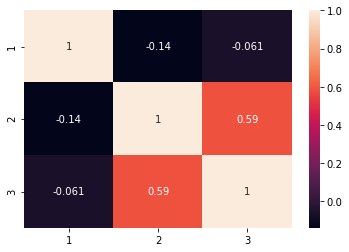

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [4]
Bin -  [5]
Bin -  [6]
Bin -  [7]
Bin -  [8, 9]


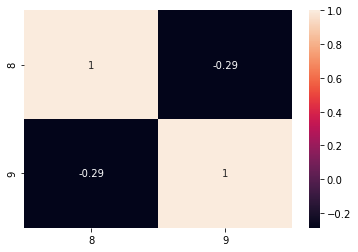

Cluster -  [1 2]
Number of cluster = 2
Bin -  [10, 11, 12, 13, 14]


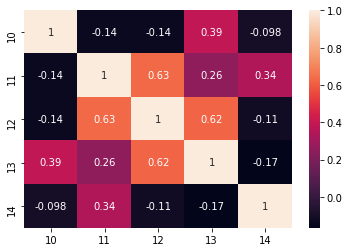

Cluster -  [3 1 1 2 4]
Number of cluster = 4
Bin -  [15, 16, 17]


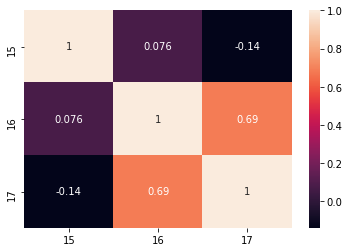

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [18, 19]


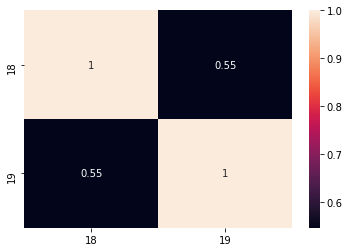

Cluster -  [1 2]
Number of cluster = 2
Bin -  [20, 21]


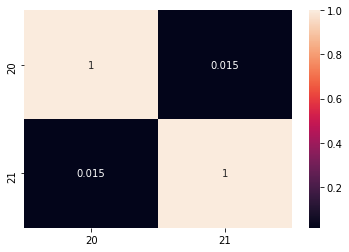

Cluster -  [1 2]
Number of cluster = 2
Bin -  [22, 23, 24]


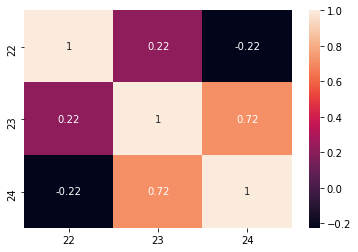

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [25, 26]


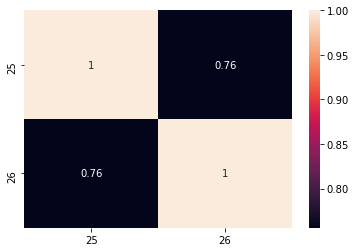

Cluster -  [1 2]
Number of cluster = 2
Bin -  [27, 28]


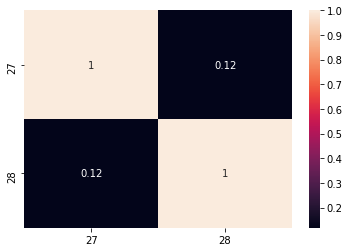

Cluster -  [1 2]
Number of cluster = 2
Bin -  [29, 30, 31, 32, 33, 34, 35, 36, 37]


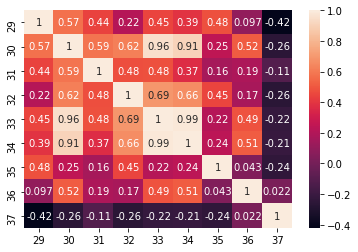

Cluster -  [1 1 1 1 1 1 1 1 2]
Number of cluster = 2
Bin -  [38, 39, 40, 41, 42]


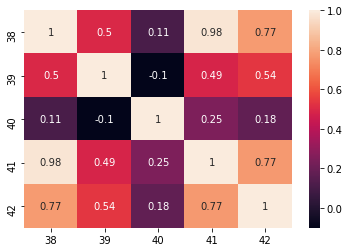

Cluster -  [1 2 3 1 1]
Number of cluster = 3
Bin -  [43, 44, 45, 46]


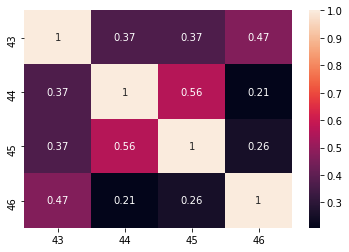

Cluster -  [3 1 2 4]
Number of cluster = 4
Bin -  [47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


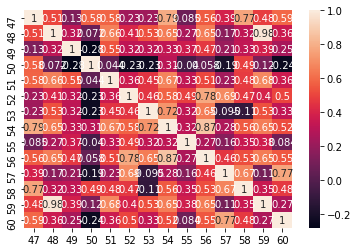

Cluster -  [1 4 3 5 4 2 4 4 3 4 2 1 4 2]
Number of cluster = 5
Isotopes are m/z 732 and 731 and corr = -0.073888
Isotopes are m/z 305 and 306 and corr = -0.138492
Isotopes are m/z 568 and 569 and corr = -0.064030
Bin -  [61, 62, 63]


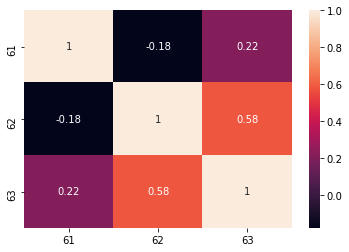

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [64, 65, 66, 67, 68, 69]


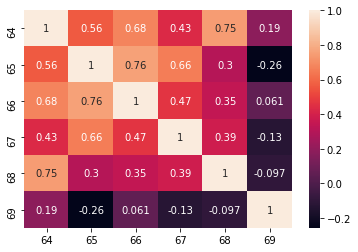

Cluster -  [1 1 1 1 1 2]
Number of cluster = 2
Bin -  [70, 71, 72]


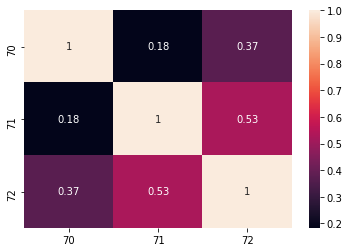

Cluster -  [3 1 2]
Number of cluster = 3
Bin -  [73, 74, 75, 76, 77]


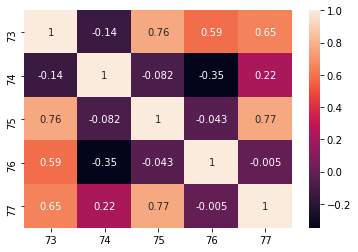

Cluster -  [1 3 1 2 1]
Number of cluster = 3
Bin -  [78]
Bin -  [79]
Bin -  [80]
Bin -  [81]
Bin -  [82]
Bin -  [83]
Bin -  [84]
Bin -  [85]
Bin -  [86]
Bin -  [87, 88]


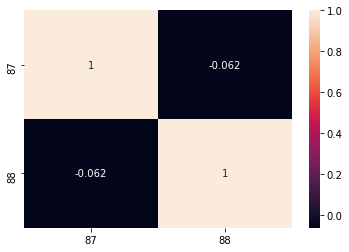

Cluster -  [1 2]
Number of cluster = 2
Bin -  [89]
Bin -  [90, 91, 92, 93, 94, 95, 96]


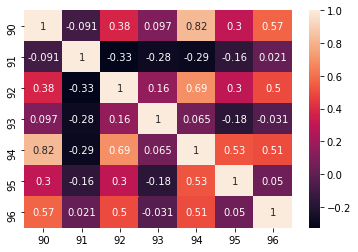

Cluster -  [1 3 1 2 1 1 1]
Number of cluster = 3
Bin -  [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]


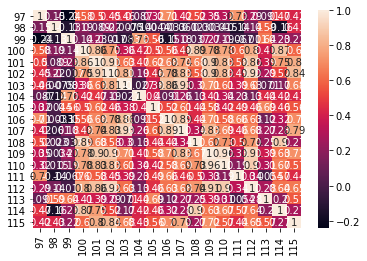

Cluster -  [2 3 1 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2]
Number of cluster = 3
Isotopes are m/z 544 and 545 and corr = -0.137301
Isotopes are m/z 558 and 559 and corr = 0.621732
Bin -  [116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]


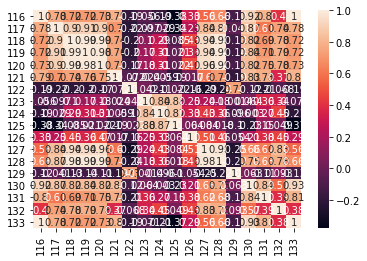

Cluster -  [1 1 1 1 1 1 2 3 3 3 1 1 1 2 1 1 1 1]
Number of cluster = 3
Isotopes are m/z 351 and 352 and corr = 0.590597
Isotopes are m/z 352 and 353 and corr = 0.575025
Isotopes are m/z 353 and 354 and corr = 0.471987
Isotopes are m/z 354 and 355 and corr = 0.454282
Isotopes are m/z 388 and 389 and corr = 0.021725
Bin -  [134, 135, 136, 137, 138, 139]


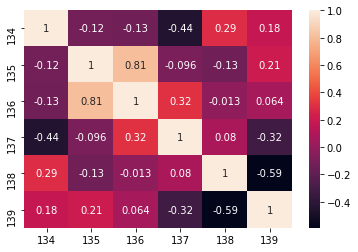

Cluster -  [1 3 3 4 2 5]
Number of cluster = 5
Isotopes are m/z 398 and 399 and corr = -0.138492
Bin -  [140, 141]


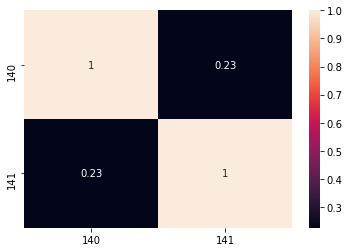

Cluster -  [1 2]
Number of cluster = 2
Bin -  [142]
Bin -  [143]
Bin -  [144, 145, 146, 147]


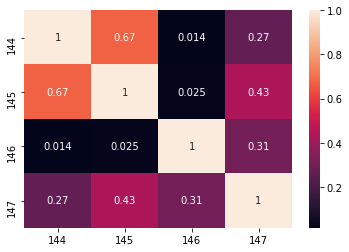

Cluster -  [1 1 3 2]
Number of cluster = 3
Bin -  [148, 149]


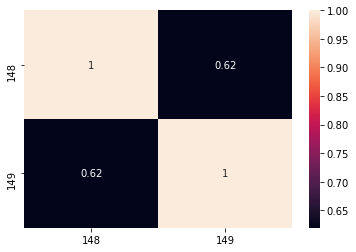

Cluster -  [1 2]
Number of cluster = 2
Bin -  [150]
Bin -  [151, 152]


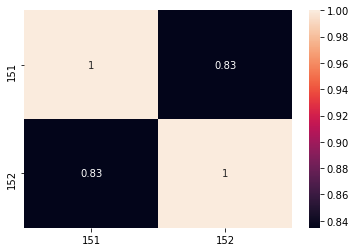

Cluster -  [1 2]
Number of cluster = 2
Bin -  [153]
Bin -  [154, 155]


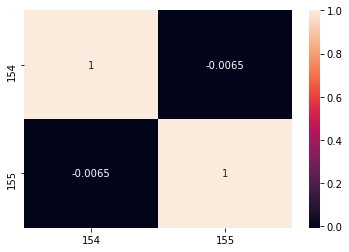

Cluster -  [1 2]
Number of cluster = 2
Bin -  [156]
Bin -  [157]
Bin -  [158]
Bin -  [159, 160]


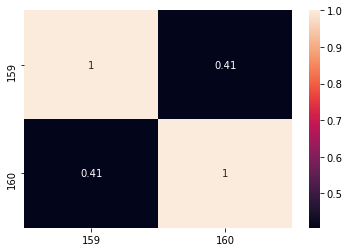

Cluster -  [1 2]
Number of cluster = 2
Bin -  [161]
Bin -  [162, 163, 164, 165]


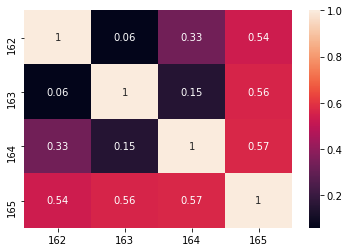

Cluster -  [3 4 1 2]
Number of cluster = 4
Bin -  [166]
Bin -  [167]
Bin -  [168, 169]


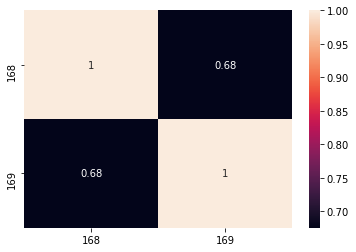

Cluster -  [1 2]
Number of cluster = 2
Bin -  [170, 171, 172]


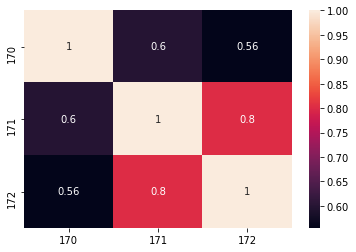

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [173]
Bin -  [174]
Bin -  [175, 176, 177, 178]


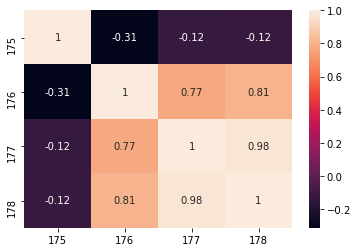

Cluster -  [2 1 1 1]
Number of cluster = 2
Bin -  [179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


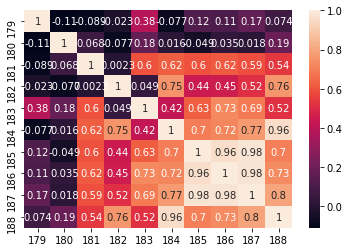

Cluster -  [3 4 1 2 1 1 1 1 1 1]
Number of cluster = 4
Bin -  [189, 190]


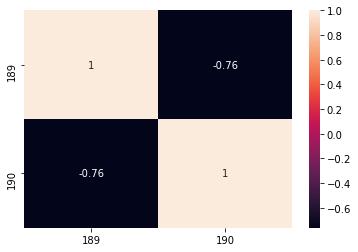

Cluster -  [1 2]
Number of cluster = 2
Bin -  [191]
Bin -  [192]
Bin -  [193]
Bin -  [194]
Bin -  [195, 196]


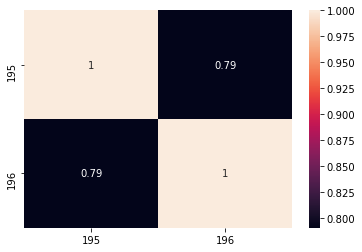

Cluster -  [1 2]
Number of cluster = 2
Bin -  [197]
Bin -  [198]
Bin -  [199]
Bin -  [200, 201]


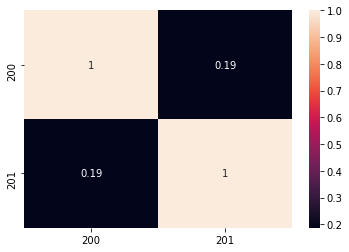

Cluster -  [1 2]
Number of cluster = 2
Bin -  [202, 203, 204]


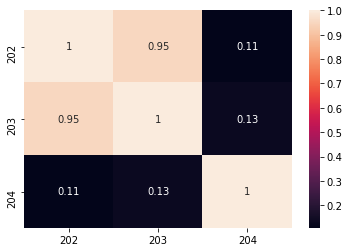

Cluster -  [1 1 2]
Number of cluster = 2
Bin -  [205]
Bin -  [206, 207]


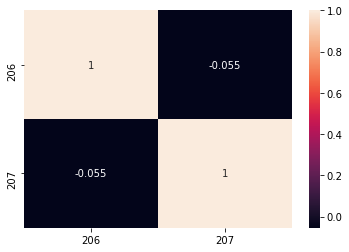

Cluster -  [1 2]
Number of cluster = 2
Bin -  [208, 209, 210, 211, 212, 213, 214]


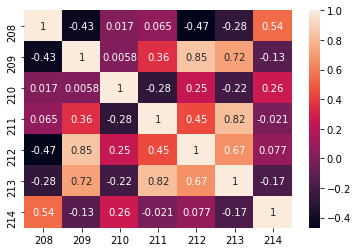

Cluster -  [2 1 3 1 1 1 2]
Number of cluster = 3
Bin -  [215, 216, 217]


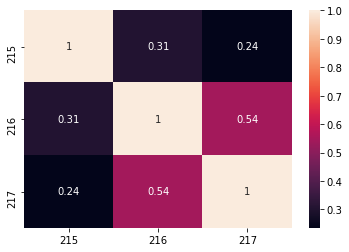

Cluster -  [3 1 2]
Number of cluster = 3
Bin -  [218]
Bin -  [219]
Bin -  [220]
Bin -  [221]
Bin -  [222]
Bin -  [223, 224]


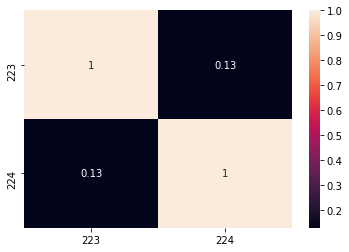

Cluster -  [1 2]
Number of cluster = 2
Bin -  [225]
Bin -  [226]
Bin -  [227]
Bin -  [228, 229]


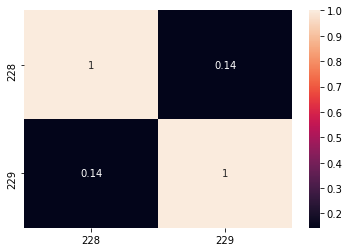

Cluster -  [1 2]
Number of cluster = 2
Bin -  [230]
Bin -  [231, 232, 233, 234, 235, 236]


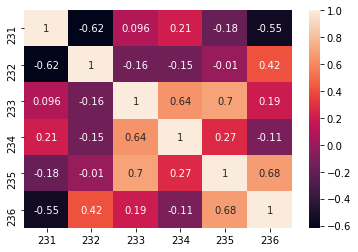

Cluster -  [4 3 1 1 2 2]
Number of cluster = 4
Bin -  [237]
Bin -  [238, 239, 240]


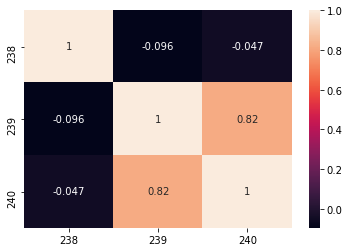

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [241, 242, 243, 244]


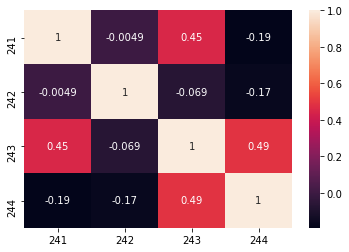

Cluster -  [3 4 1 2]
Number of cluster = 4
Bin -  [245]
Bin -  [246]
Bin -  [247]
Bin -  [248, 249, 250, 251]


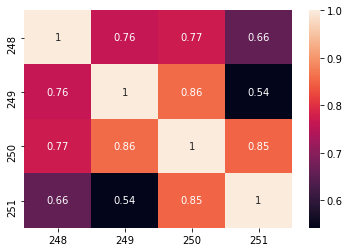

Cluster -  [1 2 3 4]
Number of cluster = 4
Bin -  [252, 253, 254, 255, 256, 257, 258]


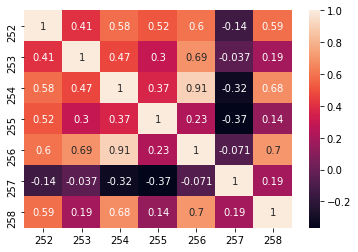

Cluster -  [1 1 1 2 1 3 1]
Number of cluster = 3
Isotopes are m/z 339 and 338 and corr = -0.147936
Bin -  [259]
Bin -  [260]
Bin -  [261]
Bin -  [262, 263, 264]


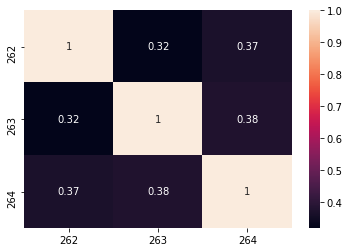

Cluster -  [3 1 2]
Number of cluster = 3
Bin -  [265, 266, 267]


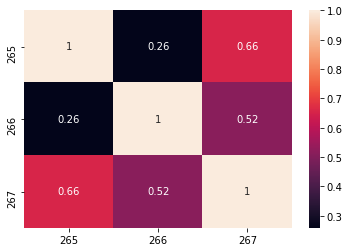

Cluster -  [1 3 2]
Number of cluster = 3
Bin -  [268, 269, 270, 271, 272]


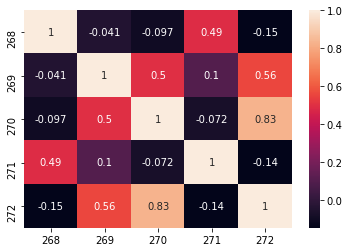

Cluster -  [1 2 2 1 2]
Number of cluster = 2
Isotopes are m/z 495 and 494 and corr = -0.138492
Bin -  [273, 274, 275, 276, 277]


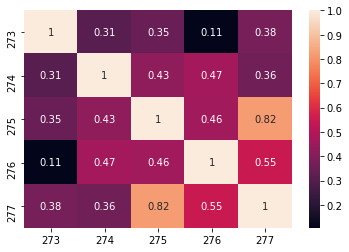

Cluster -  [4 2 1 3 1]
Number of cluster = 4
Bin -  [278, 279]


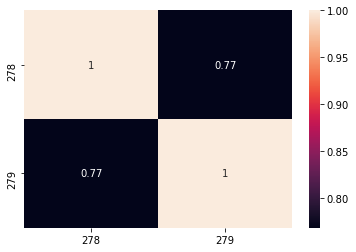

Cluster -  [1 2]
Number of cluster = 2
Bin -  [280]
Bin -  [281, 282, 283, 284, 285, 286, 287, 288]


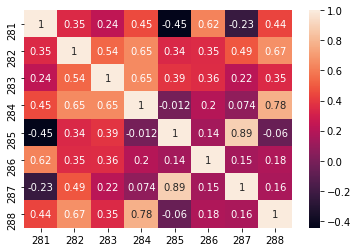

Cluster -  [3 2 2 2 1 3 1 2]
Number of cluster = 3
Bin -  [289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305]


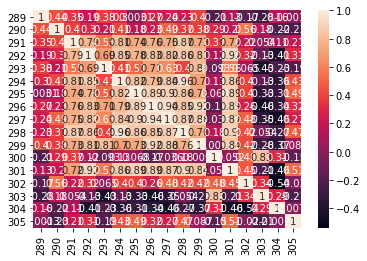

Cluster -  [2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2]
Number of cluster = 2
Isotopes are m/z 314 and 315 and corr = -0.138492
Isotopes are m/z 630 and 631 and corr = 0.374181
Isotopes are m/z 630 and 629 and corr = -0.050073
Isotopes are m/z 631 and 632 and corr = 0.454282
Isotopes are m/z 611 and 612 and corr = 0.021725
Isotopes are m/z 629 and 628 and corr = 0.248037
Isotopes are m/z 555 and 554 and corr = 0.337174
Bin -  [306]
Bin -  [307]
Bin -  [308, 309]


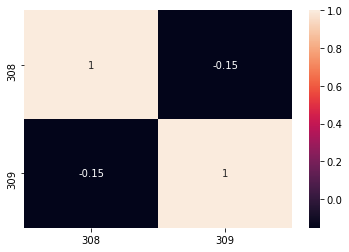

Cluster -  [1 2]
Number of cluster = 2
Bin -  [310]
Bin -  [311]
Bin -  [312]
Bin -  [313, 314]


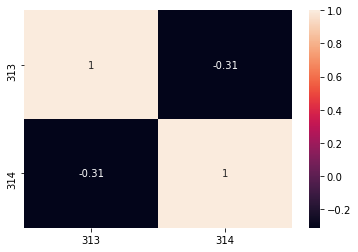

Cluster -  [1 2]
Number of cluster = 2
Bin -  [315, 316, 317, 318, 319, 320, 321]


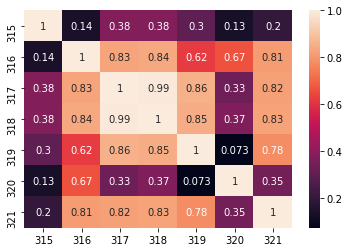

Cluster -  [2 1 1 1 1 3 1]
Number of cluster = 3
Isotopes are m/z 565 and 566 and corr = -0.134222
Isotopes are m/z 580 and 579 and corr = 0.590597
Bin -  [322, 323, 324, 325, 326]


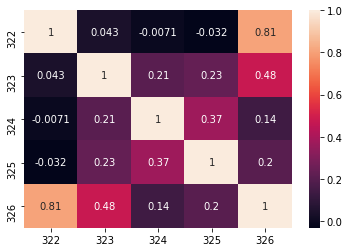

Cluster -  [1 4 2 3 1]
Number of cluster = 4
Isotopes are m/z 621 and 620 and corr = -0.138492
Bin -  [327]
Bin -  [328, 329, 330, 331, 332, 333, 334, 335, 336]


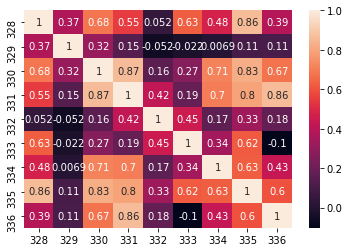

Cluster -  [1 4 1 1 2 3 1 1 1]
Number of cluster = 4
Isotopes are m/z 535 and 536 and corr = 0.575025
Bin -  [337, 338]


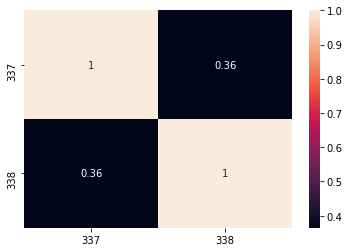

Cluster -  [1 2]
Number of cluster = 2
Bin -  [339, 340, 341, 342, 343, 344, 345, 346]


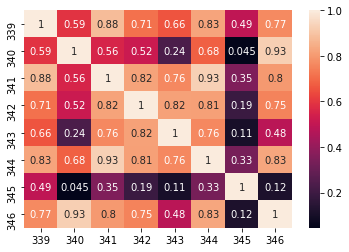

Cluster -  [1 1 1 1 1 1 2 1]
Number of cluster = 2
Bin -  [347]
Bin -  [348, 349]


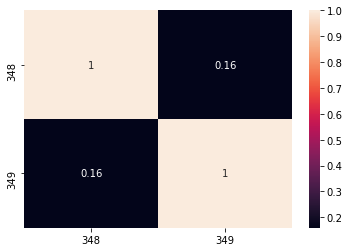

Cluster -  [1 2]
Number of cluster = 2
Bin -  [350, 351, 352, 353, 354]


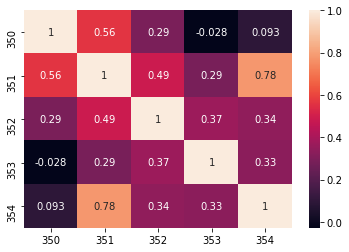

Cluster -  [4 1 2 3 1]
Number of cluster = 4
Bin -  [355]
Bin -  [356, 357, 358]


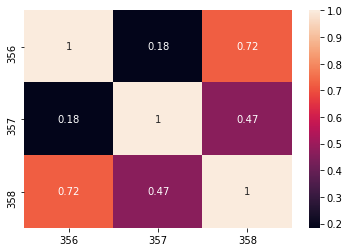

Cluster -  [1 2 1]
Number of cluster = 2
Bin -  [359]
Bin -  [360]
Bin -  [361, 362]


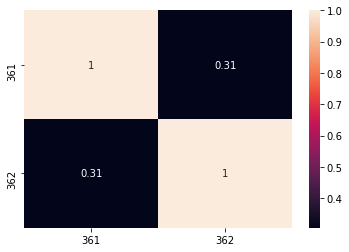

Cluster -  [1 2]
Number of cluster = 2
Bin -  [363, 364]


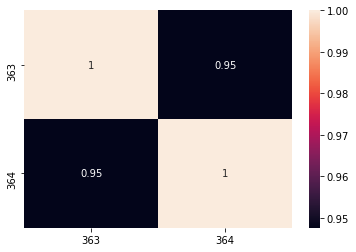

Cluster -  [1 2]
Number of cluster = 2
Bin -  [365, 366, 367, 368, 369, 370, 371]


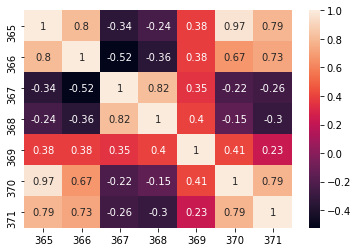

Cluster -  [2 2 1 1 3 2 2]
Number of cluster = 3
Isotopes are m/z 294 and 293 and corr = 0.590597
Isotopes are m/z 305 and 306 and corr = 0.471987
Bin -  [372, 373]


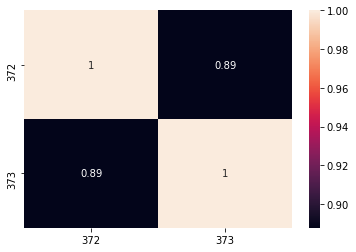

Cluster -  [1 2]
Number of cluster = 2
Bin -  [374]
Bin -  [375, 376, 377, 378, 379, 380]


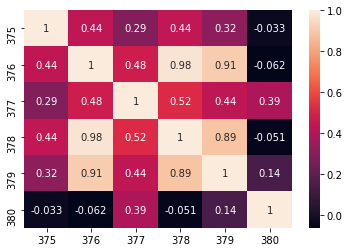

Cluster -  [3 1 2 1 1 4]
Number of cluster = 4
Isotopes are m/z 281 and 282 and corr = -0.061143
Bin -  [381]
Bin -  [382, 383]


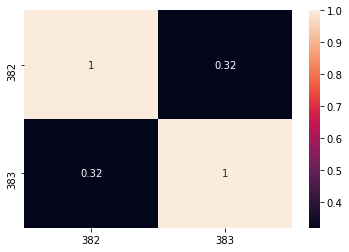

Cluster -  [1 2]
Number of cluster = 2
Bin -  [384, 385, 386, 387, 388, 389, 390, 391, 392]


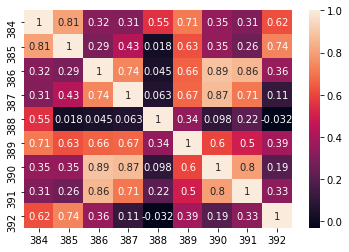

Cluster -  [1 1 2 2 3 2 2 2 1]
Number of cluster = 3
Isotopes are m/z 548 and 549 and corr = 0.575025
Isotopes are m/z 562 and 563 and corr = 0.454282
Bin -  [393]
Bin -  [394]
Bin -  [395, 396, 397, 398, 399, 400]


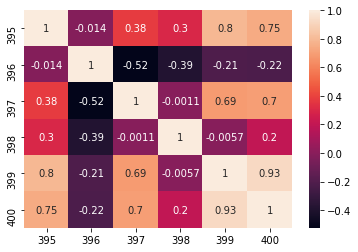

Cluster -  [1 3 1 2 1 1]
Number of cluster = 3
Bin -  [401, 402]


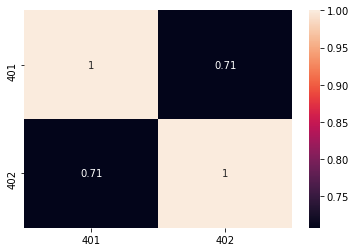

Cluster -  [1 2]
Number of cluster = 2
Bin -  [403]
Bin -  [404]
Bin -  [405]
Bin -  [406, 407, 408, 409, 410, 411, 412]


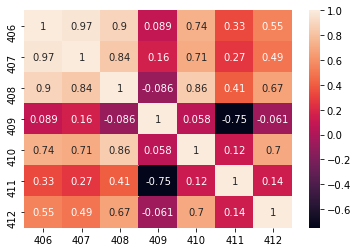

Cluster -  [1 1 1 3 1 2 1]
Number of cluster = 3
Isotopes are m/z 286 and 287 and corr = 0.094761
Bin -  [413, 414, 415]


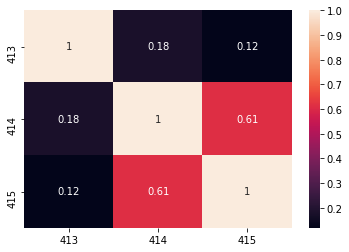

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [416, 417, 418]


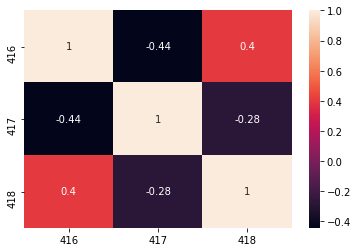

Cluster -  [1 2 1]
Number of cluster = 2
Bin -  [419, 420, 421, 422, 423]


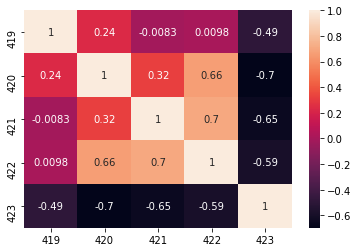

Cluster -  [2 1 1 1 3]
Number of cluster = 3
Bin -  [424, 425, 426, 427]


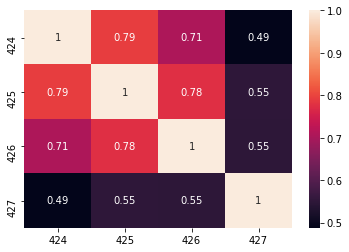

Cluster -  [1 1 1 2]
Number of cluster = 2
Isotopes are m/z 341 and 342 and corr = -0.138492
Bin -  [428, 429, 430, 431, 432, 433]


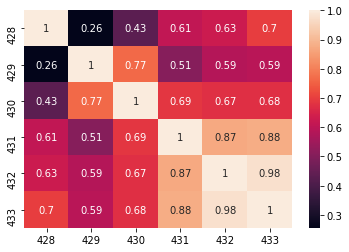

Cluster -  [3 1 1 2 2 2]
Number of cluster = 3
Isotopes are m/z 319 and 320 and corr = -0.138492
Bin -  [434]
Bin -  [435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464]


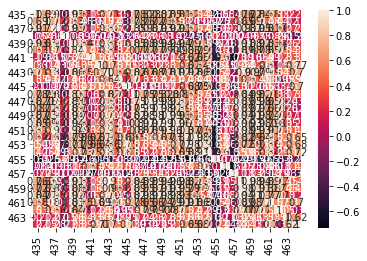

Cluster -  [1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1]
Number of cluster = 2
Isotopes are m/z 185 and 186 and corr = 0.048515
Isotopes are m/z 185 and 184 and corr = 0.126024
Isotopes are m/z 584 and 583 and corr = 0.223051
Isotopes are m/z 186 and 187 and corr = -0.280132
Isotopes are m/z 370 and 371 and corr = 0.621732
Isotopes are m/z 371 and 372 and corr = -0.165426
Isotopes are m/z 372 and 373 and corr = 0.501914
Isotopes are m/z 373 and 374 and corr = 0.075752
Isotopes are m/z 374 and 375 and corr = 0.685192
Isotopes are m/z 375 and 377 and corr = 0.538337
Bin -  [465, 466, 467, 468]


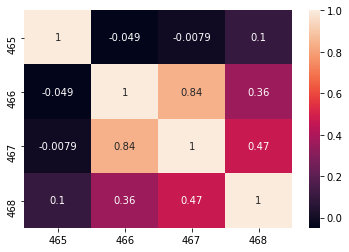

Cluster -  [3 1 1 2]
Number of cluster = 3


In [118]:
#retention time tolerance
rt_tol = 0.01
ind = []
j=1
for i in range(0,470):
    if (df3.T.iat[j,2]-df3.T.iat[i,2])>rt_tol:
        print("Bin - ",ind)
        if len(ind)>1:
            corr(ind)
            isotope(ind)
        ind = []
        ind.append(df3.T.index[i])
    else:
        ind.append(df3.T.index[i])
    j=j+1

In [21]:
f = open("anno.txt", "r")
print(f.read())

Annotation	Mass	Mode	Charge	Tier
H	1.007276	Negative	-1	1
2H	2.014552	Negative	-2	1
3H	3.021828	Negative	-3	1
NH4+	18.033823	Negative	-1	2
Na	22.989218	Negative	-1	1
H+Na	23.996494	Negative	-2	1
2H+Na	25.003770	Negative	-3	1
K	38.963158	Negative	-1	2
H+K	39.970434	Negative	-2	2
2H+K	40.977710	Negative	-3	2
2Na	45.978436	Negative	-2	1
H+2Na	46.985712	Negative	-3	1
Na+K	61.952376	Negative	-2	2
H+Na+K	62.959652	Negative	-3	2
3Na	68.967654	Negative	-3	1
2K	77.926316	Negative	-2	2
H+2K	78.933592	Negative	-3	2
2Na+K	84.941594	Negative	-3	2
Na+2K	100.915534	Negative	-3	2
3K	116.889474	Negative	-3	2
H	-1.007276	Negative	-1	1
Cl-	34.969402	Negative	-1	1
COOH-	44.998201	Negative	-1	1
H2O+CO	-46.005479	Both	0	1
NH3+H2O	-35.037114	Both	0	1
H2O	-18.010565	Both	0	1
NH3	-17.026549	Both	0	1
Na-H	21.981945	Both	0	1
MeOH	32.026215	Both	0	1
K-H	37.955882	Both	0	1
Acetonitrile	41.026549	Both	0	1
2Na-2H	43.963890	Both	0	1
HCOOH	46.005479	Both	0	1
NaCl	57.958622	Both	0	1
3Na-3H	65.945835	Both	0	1
NaCOOH	67.

In [22]:
with open(r"anno.txt", "r+") as f: 
    data = f.readlines() 
    mass=[]
    charge = []
    anno = []
for x in data:
    mass.append(x.split('\t')[1])
    charge.append(x.split('\t')[3])
    anno.append(x.split('\t')[0])
f.close()

In [23]:
mass.pop(0)
charge.pop(0)
anno.pop(0)

'Annotation'

In [24]:
mass = np.array(mass)
m1 = mass[0:23]
charge = np.array(charge) 
c1 = charge[0:23]
anno = np.array(anno)
m1 = m1.astype('float')
c1 = c1.astype('float')
mass = mass.astype('float')

In [25]:
mz1 = np.divide(m1,c1)
len(mz1)

23

In [26]:
mz = np.append(mz1,mass[23:42])

In [27]:
mz

array([ -1.007276  ,  -1.007276  ,  -1.007276  , -18.033823  ,
       -22.989218  , -11.998247  ,  -8.33459   , -38.963158  ,
       -19.985217  , -13.65923667, -22.989218  , -15.661904  ,
       -30.976188  , -20.98655067, -22.989218  , -38.963158  ,
       -26.31119733, -28.31386467, -33.63851133, -38.963158  ,
         1.007276  , -34.969402  , -44.998201  , -46.005479  ,
       -35.037114  , -18.010565  , -17.026549  ,  21.981945  ,
        32.026215  ,  37.955882  ,  41.026549  ,  43.96389   ,
        46.005479  ,  57.958622  ,  65.945835  ,  67.987424  ,
        83.961361  ,  89.969369  , 113.992903  , 115.917245  ,
       125.946046  , 135.974848  ])

In [70]:
df3.iloc[:,[435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464]]

,435,436,437,438,439,440,441,442,443,444,...,455,456,457,458,459,460,461,462,463,464
ID,579.000000,580.000000,581.000000,583.000000,586.000000,588.000000,589.000000,590.000000,591.000000,592.000000,...,604.000000,605.000000,606.000000,607.000000,608.000000,610.000000,611.000000,612.000000,613.000000,614.000000
mz,318.739000,185.991000,395.973000,733.505000,562.995000,584.977000,586.983000,169.988000,186.995000,190.002000,...,513.332000,566.004000,583.975000,78.960000,96.971000,184.988000,187.999000,282.956000,284.963000,285.966000
RT_median,14.610000,14.640000,14.640000,14.640000,14.650000,14.650000,14.650000,14.660000,14.660000,14.660000,...,14.660000,14.660000,14.660000,14.670000,14.670000,14.670000,14.670000,14.670000,14.670000,14.670000
Intensity_11801 600uE CLDC BR1 IS IDA-1,9.872886,9.575219,9.511445,8.395475,9.968572,9.101494,7.667364,7.543395,10.507845,8.343490,...,7.972714,8.622970,7.017004,10.341732,9.937462,12.578258,12.296266,8.460900,7.384499,9.521071
Intensity_11801 600uE CLDC BR2 IS IDA-1,9.363315,9.064790,9.342705,8.787613,9.644302,9.316459,7.667364,7.063596,10.262795,7.705294,...,7.699258,8.476150,7.017004,10.492545,9.909946,12.443887,12.220325,9.588964,7.384499,9.189519
Intensity_11801 LDC 25-HR BR1 IS IDA-1,8.942934,7.753349,8.553550,8.395475,8.658830,8.581626,7.667364,7.090019,9.504371,7.705294,...,7.699258,8.476150,7.017004,9.139602,8.474582,10.769814,11.374397,7.999655,5.647424,8.835947
Intensity_11801 LDC 25-HR BR2 IS IDA-1,8.942934,7.695503,8.209047,8.395475,8.658830,8.976802,8.271029,7.041315,9.600514,7.323652,...,7.699258,8.476150,6.143370,9.126325,8.590076,10.499529,11.476349,8.460900,7.384499,9.053455
Intensity_11801 LDC 31-HR BR1 IS IDA-1,8.942934,8.013145,8.872695,8.395475,8.658830,8.772218,7.667364,7.227365,9.588005,7.705294,...,7.699258,8.476150,7.643761,9.520519,8.995268,11.433245,11.502818,8.829945,7.384499,8.838356
Intensity_11801 LDC 31-HR BR2 IS IDA-1,8.942934,8.412004,8.553550,8.395475,8.658830,8.841239,7.090393,7.161048,9.652313,7.500806,...,7.699258,7.870697,8.005817,9.769989,9.108712,11.547632,11.446537,8.979371,7.384499,9.023101
Intensity_11801 LDC 37-HR BR1 IS IDA-1,8.942934,7.752524,8.553550,6.331466,8.658830,8.841239,7.667364,7.161048,9.834757,7.874982,...,7.566156,8.476150,7.017004,9.575914,9.062441,10.555206,11.683942,8.206251,7.384499,9.353905
